In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
airfare = pd.read_table("/Users/user/Desktop/Yonsei/Junior/3-2/Introduction to Data Analysis and Regression/Homework/airfares.txt", index_col=0)
airfare

,Fare,Distance
City,,
1,360,1463
2,360,1448
3,207,681
4,111,270
5,93,190
6,141,393
7,291,1102
8,183,578
9,309,1204


In [3]:
lm_data_hw3_1 = smf.ols(formula='Fare~Distance', data=airfare).fit()

In [4]:
lm_data_hw3_1.summary()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2469.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           4.62e-18
Time:                        21:34:42   Log-Likelihood:                -62.889
No. Observations:                  17   AIC:                             129.8
Df Residuals:                      15   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.9718      4.405     11.116      0.000      39.582      58.362
Distance       0.2197      0.004     49.692      0.000       0.210       0.229
==============================================================================
Omnibus:                        4.459   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                2.075
Skew:                           0.550   Prob(JB):                        0.354
Kurtosis:                       4.312   Cond. No.                     1.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
st_residuals_hw3_1 = lm_data_hw3_1.resid_pearson

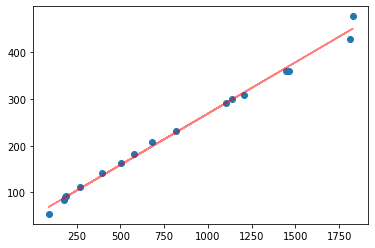

In [6]:
plt.scatter(airfare['Distance'], airfare['Fare'])
plt.plot(airfare['Distance'], lm_data_hw3_1.params[0] + lm_data_hw3_1.params[1] * airfare['Distance'], color='red', alpha=0.5)
plt.show()

In [7]:
st_residuals_abs_hw3_1 = np.abs(st_residuals_hw3_1)

In [8]:
airfare['residuals'] = lm_data_hw3_1.resid

In [9]:
airfare['st_residuals'] = st_residuals_hw3_1

In [10]:
airfare['st_residuals_abs'] = st_residuals_abs_hw3_1

In [11]:
airfare

,Fare,Distance,residuals,st_residuals,st_residuals_abs
City,,,,,
1,360,1463,-10.374342,-0.996365,0.996365
2,360,1448,-7.079032,-0.679879,0.679879
3,207,681,8.421154,0.808778,0.808778
4,111,270,2.712649,0.260526,0.260526
5,93,190,2.287636,0.219707,0.219707
6,141,393,5.691107,0.546581,0.546581
7,291,1102,-0.067214,-0.006455,0.006455
8,183,578,7.048950,0.676990,0.676990
9,309,1204,-4.475322,-0.429815,0.429815


In [12]:
lm_data_st_residuals_hw3_1 = smf.ols(formula='st_residuals_abs~Distance', data=airfare).fit()

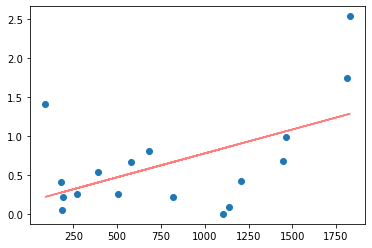

In [13]:
plt.scatter(airfare['Distance'], airfare['st_residuals_abs'])
plt.plot(airfare['Distance'], lm_data_st_residuals_hw3_1.params[0] + lm_data_st_residuals_hw3_1.params[1] * airfare['Distance'], color='red', alpha=0.5)
plt.show()


## (2,1)

<AxesSubplot:xlabel='Distance', ylabel='residuals'>

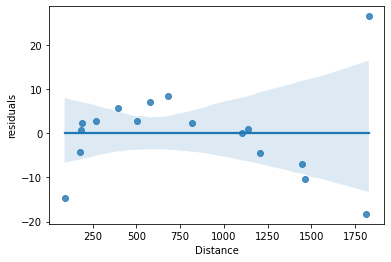

In [14]:
sns.regplot(x = 'Distance', y = 'residuals', data=airfare)

## (1,1)

In [15]:
from scipy.stats import probplot

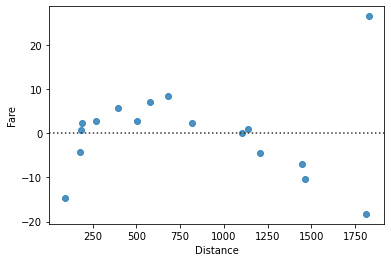

In [16]:
sns.residplot(x='Distance', y='Fare', data=airfare)
plt.show()

## (1,1)

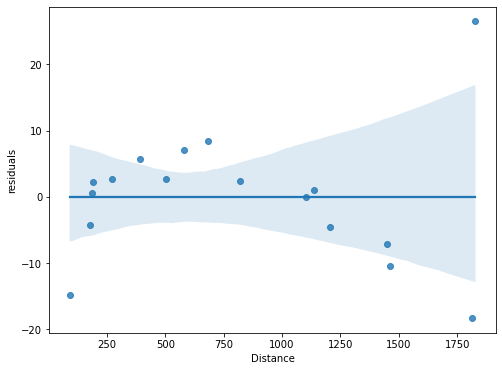

In [17]:
fig1 = plt.figure(figsize=(8,6))
sns.regplot(x = 'Distance', y = 'residuals', data=airfare)
plt.show()

fig1.savefig("fig1_hw3_1.jpg")

## (1,1)

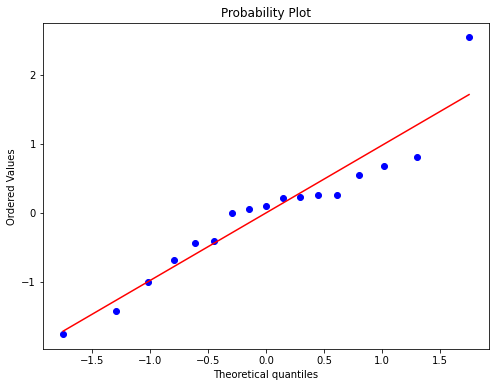

In [18]:
fig2 = plt.figure(figsize=(8,6))
st.probplot(lm_data_hw3_1.resid_pearson, dist='norm', plot=plt)
plt.show()

fig2.savefig("fig2_hw3_1.jpg")

## (1,2)

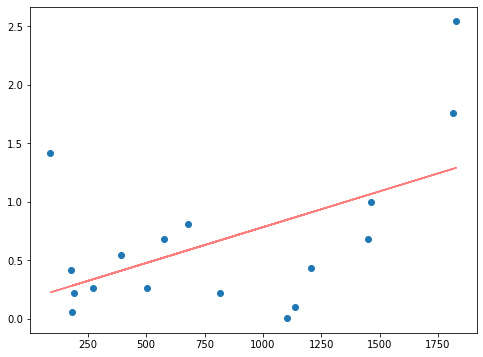

In [19]:
fig3 = plt.figure(figsize=(8,6))
plt.scatter(airfare['Distance'], airfare['st_residuals_abs'])
plt.plot(airfare['Distance'], lm_data_st_residuals_hw3_1.params[0] + lm_data_st_residuals_hw3_1.params[1] * airfare['Distance'], color='red', alpha=0.5)
plt.show()

fig3.savefig("fig3_hw3_1.jpg")

## (2,1)

<Figure size 576x432 with 0 Axes>

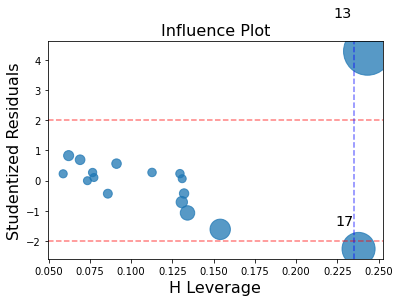

In [143]:
fig4 = plt.figure(figsize=(8,6))
sm.graphics.influence_plot(lm_data_hw3_1)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(airfare)), color='blue', linestyle='--', alpha=0.5)
plt.show()

fig4.savefig('fig4_hw3_1.jpg')

## (2,2)

---

In [21]:
logairfare = np.log(airfare)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [22]:
logairfare

,Fare,Distance,residuals,st_residuals,st_residuals_abs
City,,,,,
1,5.886104,7.288244,NaN,NaN,-0.003642
2,5.886104,7.277939,NaN,NaN,-0.385840
3,5.332719,6.523562,2.130747,-0.212231,-0.212231
4,4.709530,5.598422,0.997926,-1.345052,-1.345052
5,4.532599,5.247024,0.827519,-1.515459,-1.515459
6,4.948760,5.973810,1.738905,-0.604073,-0.604073
7,5.673323,7.004882,NaN,NaN,-5.042851
8,5.209486,6.359574,1.952879,-0.390099,-0.390099
9,5.733341,7.093405,NaN,NaN,-0.844399


In [23]:
lm_data_log_hw3_1 = smf.ols(formula='Fare~Distance', data=logairfare).fit()

In [24]:
lm_data_log_hw3_1.summary()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3141.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           7.66e-19
Time:                        21:34:44   Log-Likelihood:                 29.233
No. Observations:                  17   AIC:                            -54.47
Df Residuals:                      15   BIC:                            -52.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8555      0.079     10.795      0.000       0.687       1.024
Distance       0.6906      0.012     56.048      0.000       0.664       0.717
==============================================================================
Omnibus:                        9.902   Durbin-Watson:                   2.722
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.630
Skew:                           1.278   Prob(JB):                       0.0363
Kurtosis:                       4.682   Cond. No.                         46.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
st_residuals_log_hw3_1 = lm_data_log_hw3_1.resid_pearson

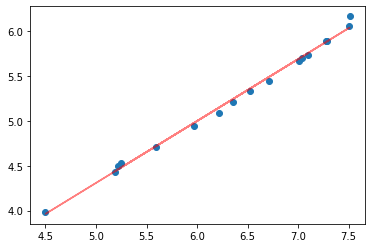

In [26]:
plt.scatter(logairfare['Distance'], logairfare['Fare'])
plt.plot(logairfare['Distance'], lm_data_log_hw3_1.params[0] + lm_data_log_hw3_1.params[1] * logairfare['Distance'], color='red', alpha=0.5)
plt.show()

In [27]:
st_residuals_abs_log_hw3_1 = np.abs(st_residuals_log_hw3_1)

In [28]:
logairfare['log_residuals'] = lm_data_log_hw3_1.resid

In [29]:
logairfare['log_st_residuals'] = st_residuals_log_hw3_1

In [30]:
logairfare['log_st_residuals_abs'] = st_residuals_abs_log_hw3_1

In [31]:
logairfare

,Fare,Distance,residuals,st_residuals,st_residuals_abs,log_residuals,log_st_residuals,log_st_residuals_abs
City,,,,,,,,
1,5.886104,7.288244,NaN,NaN,-0.003642,-0.002443,-0.052932,0.052932
2,5.886104,7.277939,NaN,NaN,-0.385840,0.004674,0.101294,0.101294
3,5.332719,6.523562,2.130747,-0.212231,-0.212231,-0.027756,-0.601483,0.601483
4,4.709530,5.598422,0.997926,-1.345052,-1.345052,-0.012065,-0.261444,0.261444
5,4.532599,5.247024,0.827519,-1.515459,-1.515459,0.053672,1.163072,1.163072
6,4.948760,5.973810,1.738905,-0.604073,-0.604073,-0.032069,-0.694937,0.694937
7,5.673323,7.004882,NaN,NaN,-5.042851,-0.019540,-0.423433,0.423433
8,5.209486,6.359574,1.952879,-0.390099,-0.390099,-0.037742,-0.817882,0.817882
9,5.733341,7.093405,NaN,NaN,-0.844399,-0.020654,-0.447566,0.447566


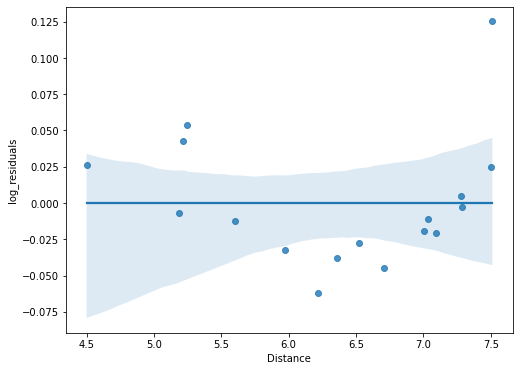

In [32]:
fig1_log = plt.figure(figsize=(8,6))
sns.regplot(x = 'Distance', y = 'log_residuals', data=logairfare)
plt.show()

fig1_log.savefig("fig1_log_hw3_1.jpg")

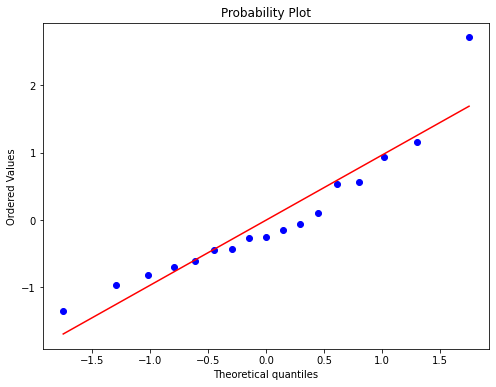

In [33]:
fig2_log = plt.figure(figsize=(8,6))
st.probplot(lm_data_log_hw3_1.resid_pearson, dist='norm', plot=plt)
plt.show()

fig2_log.savefig('fig2_log_hw3_1.jpg')

In [34]:
lm_data_st_residuals_log_hw3_1 = smf.ols(formula='log_st_residuals_abs~Distance', data=logairfare).fit()

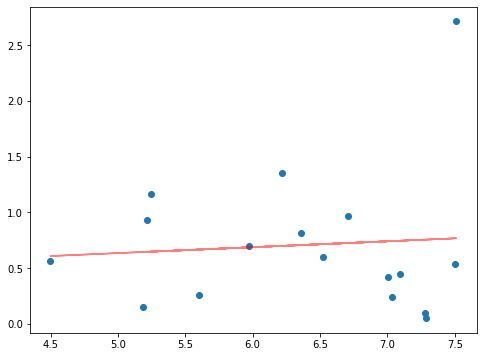

In [35]:
fig3_log = plt.figure(figsize=(8,6))
plt.scatter(logairfare['Distance'], logairfare['log_st_residuals_abs'])
plt.plot(logairfare['Distance'], lm_data_st_residuals_log_hw3_1.params[0] + lm_data_st_residuals_log_hw3_1.params[1] * logairfare['Distance'], color='red', alpha=0.5)
plt.show()

fig3_log.savefig("fig3_log_hw3_1.jpg")

<Figure size 576x432 with 0 Axes>

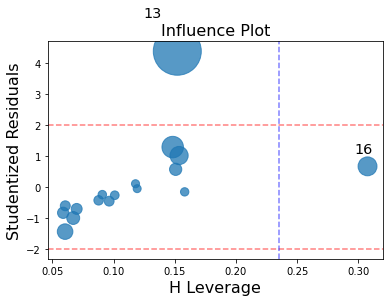

In [36]:
fig4_log = plt.figure(figsize=(8,6))
sm.graphics.influence_plot(lm_data_log_hw3_1)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(logairfare)), color='blue', linestyle='--', alpha=0.5)
plt.show()

fig4_log.savefig('fig4_log_hw3_1.jpg')

---

In [37]:
sqrtairfare = np.sqrt(airfare)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [38]:
lm_data_sqrt_hw3_1 = smf.ols(formula='Fare~Distance', data=sqrtairfare).fit()

In [39]:
lm_data_sqrt_hw3_1.summary()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     4153.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           9.52e-20
Time:                        21:34:46   Log-Likelihood:                -1.0240
No. Observations:                  17   AIC:                             6.048
Df Residuals:                      15   BIC:                             7.714
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8265      0.178     21.461      0.000       3.446       4.207
Distance       0.4021      0.006     64.445      0.000       0.389       0.415
==============================================================================
Omnibus:                       17.851   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.630
Skew:                           1.794   Prob(JB):                     0.000149
Kurtosis:                       6.465   Cond. No.                         76.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
st_residuals_sqrt_hw3_1 = lm_data_sqrt_hw3_1.resid_pearson

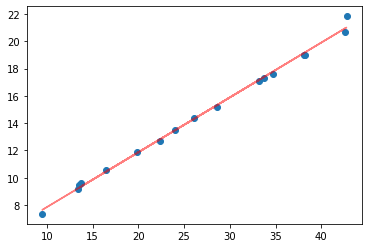

In [41]:
plt.scatter(sqrtairfare['Distance'], sqrtairfare['Fare'])
plt.plot(sqrtairfare['Distance'], lm_data_sqrt_hw3_1.params[0] + lm_data_sqrt_hw3_1.params[1] * sqrtairfare['Distance'], color='red', alpha=0.5)
plt.show()

In [42]:
st_residuals_abs_sqrt_hw3_1 = np.abs(st_residuals_sqrt_hw3_1)

In [43]:
sqrtairfare['sqrt_residuals'] = lm_data_sqrt_hw3_1.resid

In [44]:
sqrtairfare['sqrt_st_residuals'] = st_residuals_sqrt_hw3_1

In [45]:
sqrtairfare['sqrt_st_residuals_abs'] = st_residuals_abs_sqrt_hw3_1

In [46]:
sqrtairfare

,Fare,Distance,residuals,st_residuals,st_residuals_abs,sqrt_residuals,sqrt_st_residuals,sqrt_st_residuals_abs
City,,,,,,,,
1,18.973666,38.249183,NaN,NaN,0.998181,-0.233207,-0.852394,0.852394
2,18.973666,38.052595,NaN,NaN,0.824548,-0.154157,-0.563458,0.563458
3,14.387495,26.095977,2.901922,0.899321,0.899321,0.067554,0.246917,0.246917
4,10.535654,16.431677,1.647012,0.510418,0.510418,0.101830,0.372199,0.372199
5,9.643651,13.784049,1.512493,0.468730,0.468730,0.274466,1.003201,1.003201
6,11.874342,19.824228,2.385604,0.739311,0.739311,0.076338,0.279023,0.279023
7,17.058722,33.196385,NaN,NaN,0.080345,-0.116367,-0.425334,0.425334
8,13.527749,24.041631,2.654986,0.822794,0.822794,0.033883,0.123846,0.123846
9,17.578396,34.698703,NaN,NaN,0.655603,-0.200792,-0.733913,0.733913


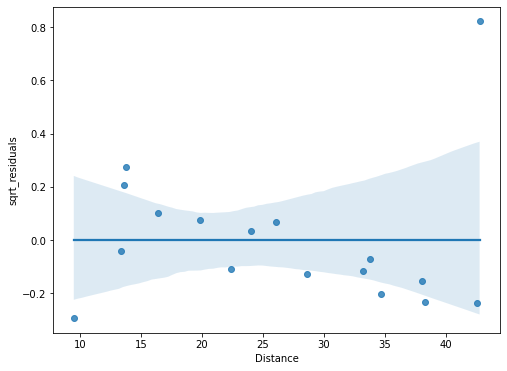

In [47]:
fig1_sqrt = plt.figure(figsize=(8,6))
sns.regplot(x = 'Distance', y = 'sqrt_residuals', data=sqrtairfare)
plt.show()

fig1_sqrt.savefig("fig1_sqrt_hw3_1.jpg")

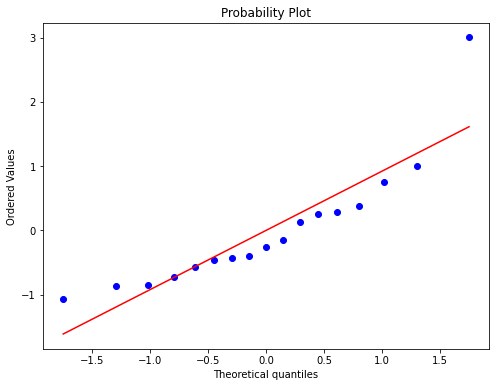

In [48]:
fig2_sqrt = plt.figure(figsize=(8,6))
st.probplot(lm_data_sqrt_hw3_1.resid_pearson, dist='norm', plot=plt)
plt.show()

fig2_sqrt.savefig("fig2_sqrt_hw3_1.jpg")

In [49]:
lm_data_st_residuals_sqrt_hw3_1 = smf.ols(formula='sqrt_st_residuals_abs~Distance', data=sqrtairfare).fit()

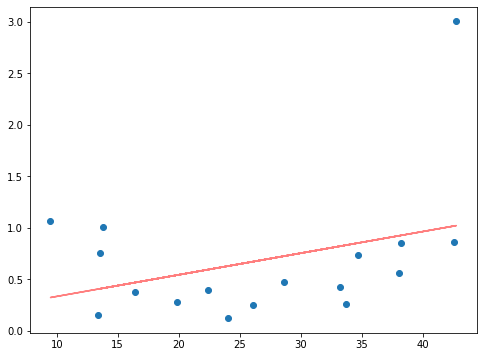

In [50]:
fig3_sqrt = plt.figure(figsize=(8,6))
plt.scatter(sqrtairfare['Distance'], sqrtairfare['sqrt_st_residuals_abs'])
plt.plot(sqrtairfare['Distance'], lm_data_st_residuals_sqrt_hw3_1.params[0] + lm_data_st_residuals_sqrt_hw3_1.params[1] * sqrtairfare['Distance'], color='red', alpha=0.5)
plt.show()

fig3_sqrt.savefig("fig3_sqrt_hw3_1.jpg")

<Figure size 576x432 with 0 Axes>

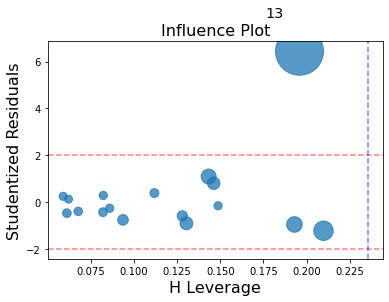

In [51]:
fig4_sqrt = plt.figure(figsize=(8,6))
sm.graphics.influence_plot(lm_data_sqrt_hw3_1)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(sqrtairfare)), color='blue', linestyle='--', alpha=0.5)
plt.show()

fig4_sqrt.savefig("fig4_sqrt_hw3_1.jpg")

---

# inverseResponsePlot

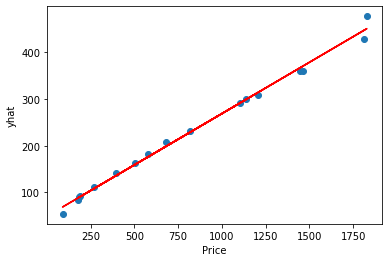

In [52]:
plt.scatter(airfare['Distance'], airfare['Fare'])
plt.plot(airfare['Distance'], lm_data_hw3_1.params[0] + lm_data_hw3_1.params[1] * airfare['Distance'], color='red')
plt.xlabel("Price")
plt.ylabel("yhat")
plt.show()

Anyway, $\hat{\lambda} = 1.02$.  
You had better use R to make InverseResponsePlot.

---

## 2.

### (a)

In [53]:
cars = pd.read_csv("/Users/user/Desktop/Yonsei/Junior/3-2/Introduction to Data Analysis and Regression/Homework/cars04.csv")
cars

,Vehicle Name,Hybrid,SuggestedRetailPrice,DealerCost,EngineSize,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,WheelBase,Length,Width
0,Chevrolet Aveo 4dr,0,11690,10965,1.6,4,103,28,34,2370,98,167,66
1,Chevrolet Aveo LS 4dr hatch,0,12585,11802,1.6,4,103,28,34,2348,98,153,66
2,Chevrolet Cavalier 2dr,0,14610,13697,2.2,4,140,26,37,2617,104,183,69
3,Chevrolet Cavalier 4dr,0,14810,13884,2.2,4,140,26,37,2676,104,183,68
4,Chevrolet Cavalier LS 2dr,0,16385,15357,2.2,4,140,26,37,2617,104,183,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Saab 9-3 Arc convertible 2dr,0,40670,38520,2.0,4,210,21,29,3480,105,182,69
230,Saab 9-3 Aero convertible 2dr,0,43175,40883,2.0,4,210,21,30,3700,105,182,69
231,Volvo C70 LPT convertible 2dr,0,40565,38203,2.4,5,197,21,28,3450,105,186,72
232,Volvo C70 HPT convertible 2dr,0,42565,40083,2.3,5,242,20,26,3450,105,186,72


In [54]:
lm_data_hw3_2 = smf.ols(formula='SuggestedRetailPrice~DealerCost', data=cars).fit()

In [55]:
lm_data_hw3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.999
Model:                              OLS   Adj. R-squared:                  0.999
Method:                   Least Squares   F-statistic:                 1.704e+05
Date:                  Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                          21:34:47   Log-Likelihood:                -1822.8
No. Observations:                   234   AIC:                             3650.
Df Residuals:                       232   BIC:                             3657.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.9042     81.801     -0.757      0.450    -223.073      99.264
DealerCost     1.0888      0.003    412.768      0.000       1.084       1.094
==============================================================================
Omnibus:                       41.776   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.412
Skew:                           0.648   Prob(JB):                     2.42e-35
Kurtosis:                       6.830   Cond. No.                     6.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

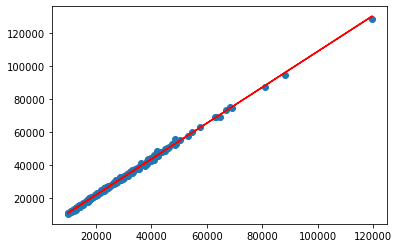

In [56]:
plt.scatter(cars['DealerCost'], cars['SuggestedRetailPrice'])
plt.plot(cars['DealerCost'], lm_data_hw3_2.params[0] + lm_data_hw3_2.params[1] * cars['DealerCost'], color='red')
plt.show()

In [57]:
st_residuals_hw3_2 = lm_data_hw3_2.resid_pearson

In [58]:
st_residuals_abs_hw3_2 = np.abs(st_residuals_hw3_2)

In [59]:
cars['st_residuals_hw3_2'] = st_residuals_hw3_2
cars['st_residuals_abs_hw3_2'] = st_residuals_abs_hw3_2

In [60]:
lm_data_st_residuals_hw3_2 = smf.ols(formula='st_residuals_abs_hw3_2~DealerCost', data=cars).fit()

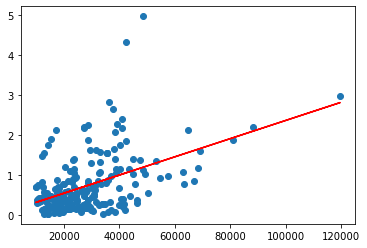

In [61]:
plt.scatter(cars['DealerCost'], st_residuals_abs_hw3_2)
plt.plot(cars['DealerCost'], lm_data_st_residuals_hw3_2.params[0] + lm_data_st_residuals_hw3_2.params[1] * cars['DealerCost'], color='red')
plt.show()

In [62]:
cars['residuals'] = lm_data_hw3_2.resid

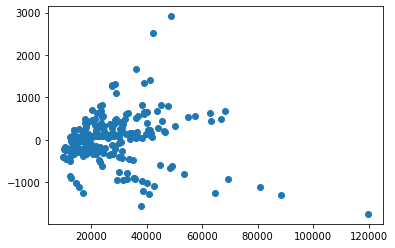

In [63]:
plt.scatter(cars['DealerCost'], cars['residuals'])
plt.show()

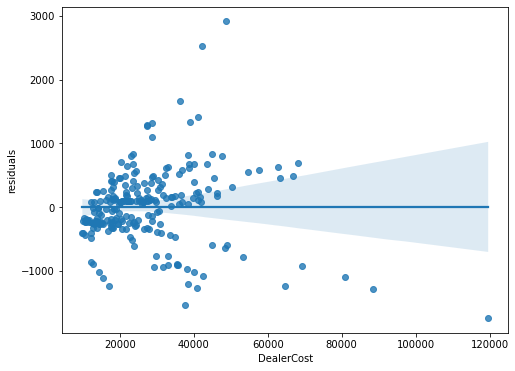

In [64]:
fig1_hw3_2 = plt.figure(figsize=(8,6))
sns.regplot(x = 'DealerCost', y = 'residuals', data=cars)
plt.show()

fig1_hw3_2.savefig("fig1_hw3_2.jpg")

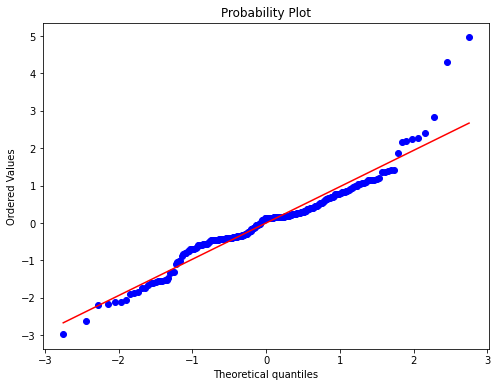

In [65]:
fig2_hw3_2 = plt.figure(figsize=(8,6))
st.probplot(lm_data_hw3_2.resid_pearson, dist='norm', plot=plt)
plt.show()

fig2_hw3_2.savefig("fig2_hw3_2.jpg")

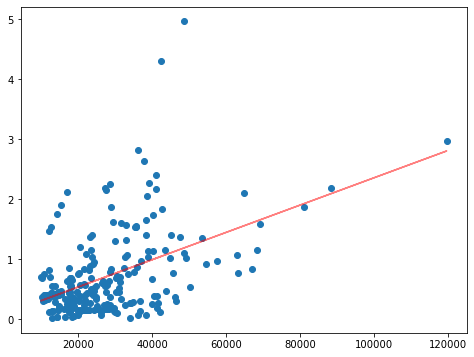

In [66]:
fig3_hw3_2 = plt.figure(figsize=(8,6))
plt.scatter(cars['DealerCost'], cars['st_residuals_abs_hw3_2'])
plt.plot(cars['DealerCost'], lm_data_st_residuals_hw3_2.params[0] + lm_data_st_residuals_hw3_2.params[1] * cars['DealerCost'], color='red', alpha=0.5)
plt.show()

fig3_hw3_2.savefig('fig3_hw3_2.jpg')

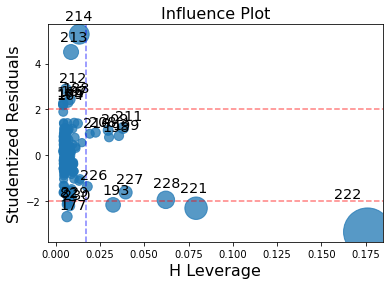

In [67]:
fig4_hw3_2 = sm.graphics.influence_plot(lm_data_hw3_2)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(cars)), color='blue', linestyle='--', alpha=0.5)
plt.show()

### (b)

(1) The squared root of absolute value of standardized residuals has a steep slope.  
(2) QQ-plot has heavy-tail.

In [68]:
logcars = np.log(cars[['DealerCost', 'SuggestedRetailPrice']])
logcars

,DealerCost,SuggestedRetailPrice
0,9.302464,9.366489
1,9.376024,9.440261
2,9.524932,9.589462
3,9.538492,9.603058
4,9.639327,9.704122
...,...,...
229,10.558933,10.613246
230,10.618470,10.673017
231,10.550669,10.610661
232,10.598708,10.658788


In [69]:
lm_data_log_hw3_2 = smf.ols(formula='SuggestedRetailPrice~DealerCost', data=logcars).fit()
lm_data_log_hw3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.998
Model:                              OLS   Adj. R-squared:                  0.998
Method:                   Least Squares   F-statistic:                 1.505e+05
Date:                  Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                          21:34:50   Log-Likelihood:                 600.70
No. Observations:                   234   AIC:                            -1197.
Df Residuals:                       232   BIC:                            -1190.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0695      0.026     -2.625      0.009      -0.122      -0.017
DealerCost     1.0148      0.003    387.942      0.000       1.010       1.020
==============================================================================
Omnibus:                       16.038   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.059
Skew:                          -0.423   Prob(JB):                     3.62e-06
Kurtosis:                       4.362   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
st_residuals_log_hw3_2 = lm_data_log_hw3_2.resid_pearson

In [71]:
st_residuals_log_abs_hw3_2 = np.abs(st_residuals_log_hw3_2)

In [72]:
logcars['st_residuals_log_hw3_2'] = st_residuals_log_hw3_2
logcars['st_residuals_log_abs_hw3_2'] = st_residuals_log_abs_hw3_2

In [73]:
lm_data_st_residuals_log_hw3_2 = smf.ols(formula='st_residuals_log_abs_hw3_2~DealerCost', data=logcars).fit()

In [74]:
logcars

,DealerCost,SuggestedRetailPrice,st_residuals_log_hw3_2,st_residuals_log_abs_hw3_2
0,9.302464,9.366489,-0.242570,0.242570
1,9.376024,9.440261,-0.289753,0.289753
2,9.524932,9.589462,-0.392491,0.392491
3,9.538492,9.603058,-0.401339,0.401339
4,9.639327,9.704122,-0.469242,0.469242
...,...,...,...,...
229,10.558933,10.613246,-1.762585,1.762585
230,10.618470,10.673017,-1.797384,1.797384
231,10.550669,10.610661,-1.451588,1.451588
232,10.598708,10.658788,-1.485054,1.485054


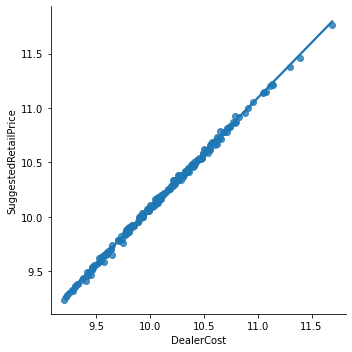

In [75]:
sns.lmplot(x='DealerCost', y='SuggestedRetailPrice', data=logcars)

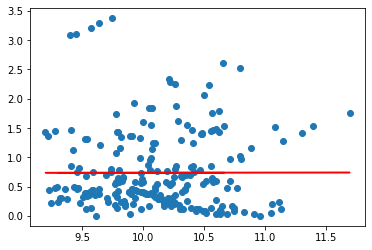

In [76]:
plt.scatter(logcars['DealerCost'], st_residuals_log_abs_hw3_2)
plt.plot(logcars['DealerCost'], lm_data_st_residuals_log_hw3_2.params[0] + lm_data_st_residuals_log_hw3_2.params[1] * logcars['DealerCost'], color='red')
plt.show()

In [77]:
logcars['residuals'] = lm_data_log_hw3_2.resid

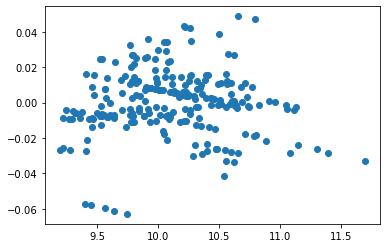

In [78]:
plt.scatter(logcars['DealerCost'], logcars['residuals'])
plt.show()

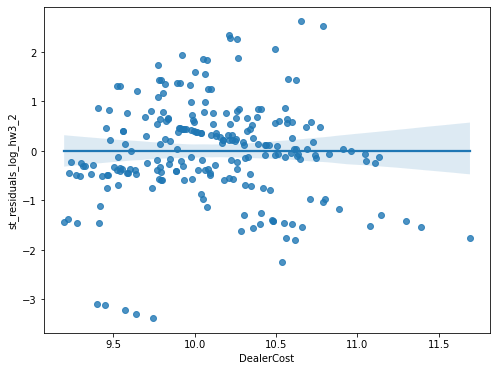

In [79]:
fig1_log_st_hw3_2 = plt.figure(figsize=(8,6))
sns.regplot(x = 'DealerCost', y = 'st_residuals_log_hw3_2', data=logcars)
plt.show()

fig1_log_st_hw3_2.savefig('fig1_log_st_hw3_2.jpg')

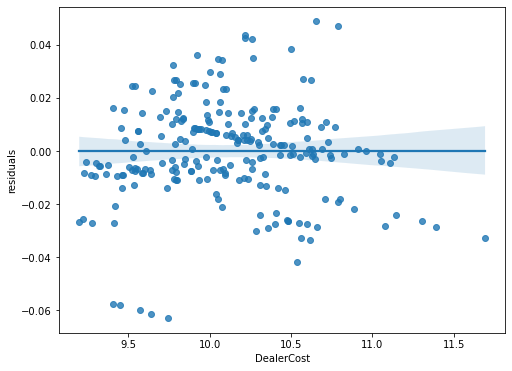

In [80]:
fig1_log_hw3_2 = plt.figure(figsize=(8,6))
sns.regplot(x='DealerCost', y='residuals', data=logcars)
plt.show()

fig1_log_hw3_2.savefig("fig1_log_hw3_2.jpg")

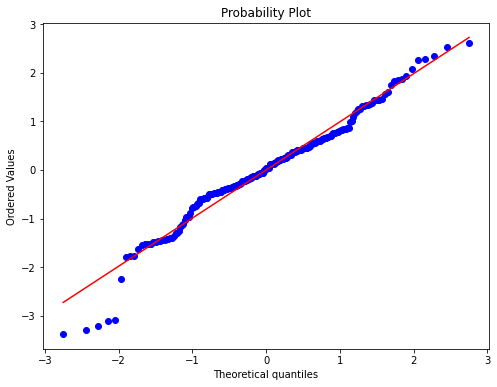

In [81]:
fig2_log_hw3_2 = plt.figure(figsize=(8,6))
st.probplot(lm_data_log_hw3_2.resid_pearson, dist='norm', plot=plt)
plt.show()

fig2_log_hw3_2.savefig("fig2_log_hw3_2.jpg")

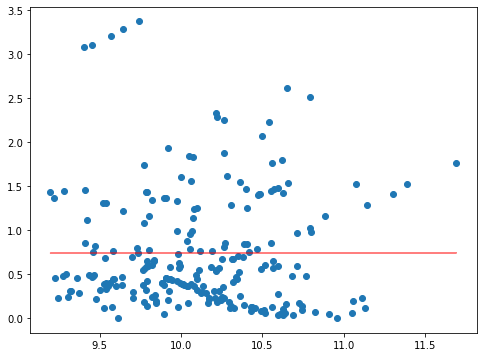

In [82]:
fig3_log_hw3_2 = plt.figure(figsize=(8,6))
plt.scatter(logcars['DealerCost'], logcars['st_residuals_log_abs_hw3_2'])
plt.plot(logcars['DealerCost'], lm_data_st_residuals_log_hw3_2.params[0] + lm_data_st_residuals_log_hw3_2.params[1] * logcars['DealerCost'], color='red', alpha=0.5)
plt.show()

fig3_log_hw3_2.savefig('fig3_log_hw3_2.jpg')

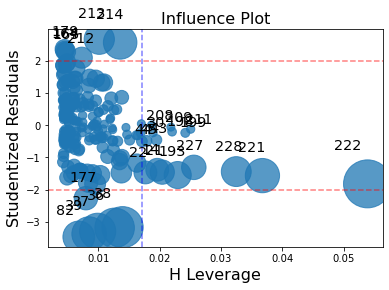

In [83]:
fig4_log_hw3_2 = sm.graphics.influence_plot(lm_data_log_hw3_2)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(logcars)), color='blue', linestyle='--', alpha=0.5)
plt.show()

### (c)

(3.11) is an improvement of (3.10). This is because  
(1) The square root of absolute value of standardized residuals have flatter regression.  
(2) The gap of fitted values are much more smaller, and the leverage, too.

### (d)

This is the percentage change of Suggested Retail Price, when the Dealer Cost fluctuates.

### (e)

(1) It still has points such that $|\gamma_i| >2$, meaning that some of them don't have the constant variances.  
(2) It improves for the large theoretical quantiles, but not works for small ones.

---

## 3.

### Part 1 - (a)

In [85]:
diamonds = pd.read_table("/Users/user/Desktop/Yonsei/Junior/3-2/Introduction to Data Analysis and Regression/Homework/diamonds.txt")

In [88]:
diamonds.head()

,Size,Price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


In [89]:
lm_data_hw3_3 = smf.ols(formula='Price~Size', data=diamonds).fit()

In [90]:
lm_data_hw3_1.summary()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2469.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           4.62e-18
Time:                        21:35:55   Log-Likelihood:                -62.889
No. Observations:                  17   AIC:                             129.8
Df Residuals:                      15   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.9718      4.405     11.116      0.000      39.582      58.362
Distance       0.2197      0.004     49.692      0.000       0.210       0.229
==============================================================================
Omnibus:                        4.459   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                2.075
Skew:                           0.550   Prob(JB):                        0.354
Kurtosis:                       4.312   Cond. No.                     1.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

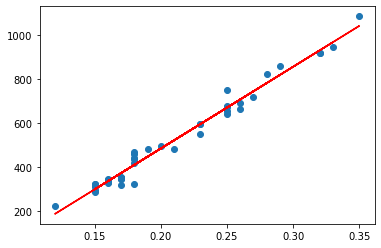

In [93]:
plt.scatter(diamonds['Size'], diamonds['Price'])
plt.plot(diamonds['Size'], lm_data_hw3_3.params[0] + lm_data_hw3_3.params[1] * diamonds['Size'], color='red')
plt.show()

In [101]:
lm_data_st_residuals_hw3_3 = smf.ols(formula='st_residuals_abs_hw3_3~Size', data=diamonds).fit()

In [110]:
st_residuals_hw3_3 = lm_data_st_residuals_hw3_3.resid_pearson

In [111]:
st_residuals_abs_hw3_3 = np.abs(st_residuals_hw3_3)

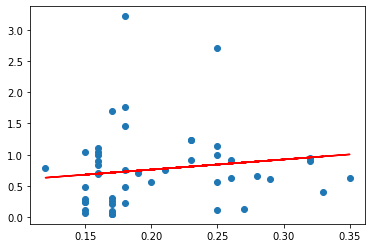

In [112]:
plt.scatter(diamonds['Size'], st_residuals_abs_hw3_3)
plt.plot(diamonds['Size'], lm_data_st_residuals_hw3_3.params[0] + lm_data_st_residuals_hw3_3.params[1] * diamonds['Size'], color='red')
plt.show()

In [115]:
diamonds['st_residuals_hw3_3'] = st_residuals_hw3_3

In [117]:
diamonds['residuals_hw3_3'] = lm_data_hw3_3.resid

In [120]:
diamonds['st_residuals_abs_hw3_3'] = np.abs(st_residuals_hw3_3)

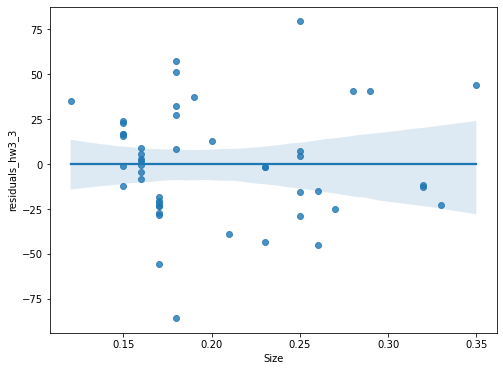

In [118]:
fig1_hw3_3 = plt.figure(figsize=(8,6))
sns.regplot(x='Size', y='residuals_hw3_3', data=diamonds)
plt.show()

fig1_hw3_3.savefig("fig1_hw3_3.jpg")

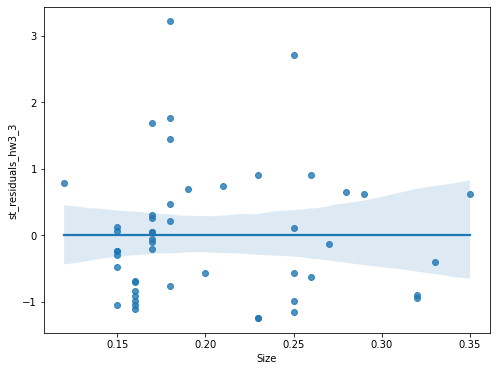

In [116]:
fig1_st_hw3_3 = plt.figure(figsize=(8,6))
sns.regplot(x = 'Size', y = 'st_residuals_hw3_3', data=diamonds)
plt.show()

fig1_st_hw3_3.savefig('fig1_st_hw3_3.jpg')

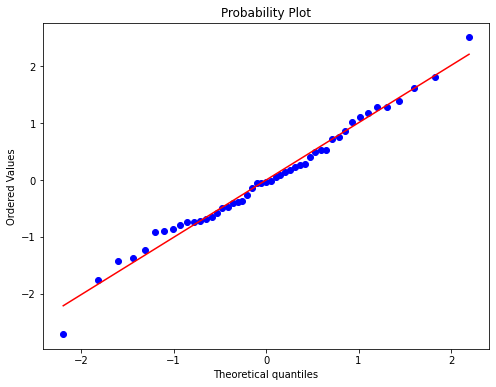

In [119]:
fig2_hw3_3 = plt.figure(figsize=(8,6))
st.probplot(lm_data_hw3_3.resid_pearson, dist='norm', plot=plt)
plt.show()

fig2_hw3_3.savefig("fig2_hw3_3.jpg")

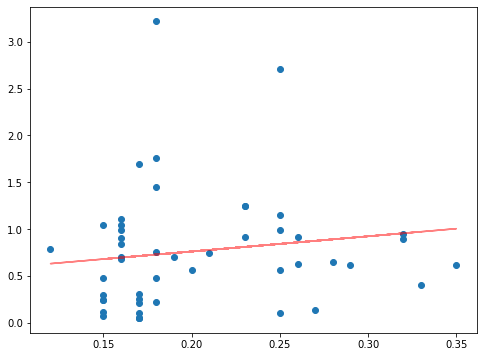

In [121]:
fig3_hw3_3 = plt.figure(figsize=(8,6))
plt.scatter(diamonds['Size'], diamonds['st_residuals_abs_hw3_3'])
plt.plot(diamonds['Size'], lm_data_st_residuals_hw3_3.params[0] + lm_data_st_residuals_hw3_3.params[1] * diamonds['Size'], color='red', alpha=0.5)
plt.show()

fig3_hw3_3.savefig('fig3_hw3_3.jpg')

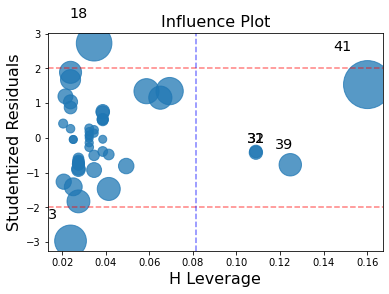

In [123]:
fig4_hw3_3 = sm.graphics.influence_plot(lm_data_hw3_3)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(diamonds)), color='blue', linestyle='--', alpha=0.5)
plt.show()

fig4_hw3_3.savefig("fig4_hw3_3.jpg")

### Part 1 - (b)

(1) The square root of absolute value of standardized residual has a  steep slope.  
(2) Square root of absolute value of standardized residual has critical points.

### Part 2 - (a)

By using the inverseResponsePlot in Rstudio, we can say that $\hat{\lambda} = 0.94$ is the best way.

In [126]:
diamonds['Improve_Price'] = np.power(diamonds['Price'],0.94)

In [128]:
diamonds.head()

,Size,Price,st_residuals_hw3_3,residuals_hw3_3,st_residuals_abs_hw3_3,Improve_Price
0,0.17,355,-0.205772,-18.503356,0.205772,249.582800
1,0.16,328,-0.700776,-8.353137,0.700776,231.697535
2,0.17,350,0.051038,-23.503356,0.051038,246.277061
3,0.18,325,3.216861,-85.653576,3.216861,229.704953
4,0.25,642,0.107569,-28.705111,0.107569,435.595040


In [129]:
lm_data_improve_hw3_3 = smf.ols(formula='Improve_Price~Size', data=diamonds).fit()

In [130]:
lm_data_improve_hw3_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Improve_Price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2147.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           7.01e-41
Time:                        22:57:31   Log-Likelihood:                -215.87
No. Observations:                  49   AIC:                             435.7
Df Residuals:                      47   BIC:                             439.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -144.0609     10.849    -13.279      0.000    -165.886    -122.236
Size        2385.7834     51.494     46.331      0.000    2282.190    2489.377
==============================================================================
Omnibus:                        1.211   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.478
Skew:                           0.046   Prob(JB):                        0.788
Kurtosis:                       3.475   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

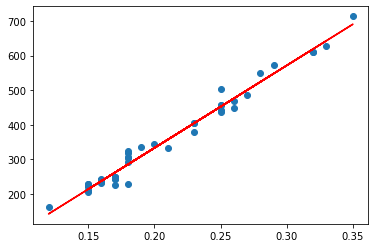

In [133]:
plt.scatter(diamonds['Size'], diamonds['Improve_Price'])
plt.plot(diamonds['Size'], lm_data_improve_hw3_3.params[0] + lm_data_improve_hw3_3.params[1] * diamonds['Size'], color='red')
plt.show()

In [136]:
diamonds['residuals_improve_hw3_3'] = lm_data_improve_hw3_3.resid

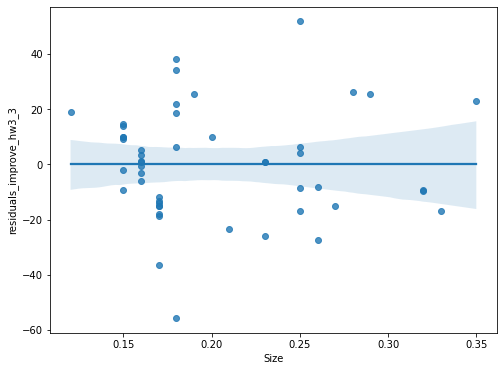

In [137]:
fig1_improve_hw3_3 = plt.figure(figsize=(8,6))
sns.regplot(x='Size', y='residuals_improve_hw3_3', data=diamonds)
plt.show()

fig1_hw3_3.savefig("fig1_improve_hw3_3.jpg")

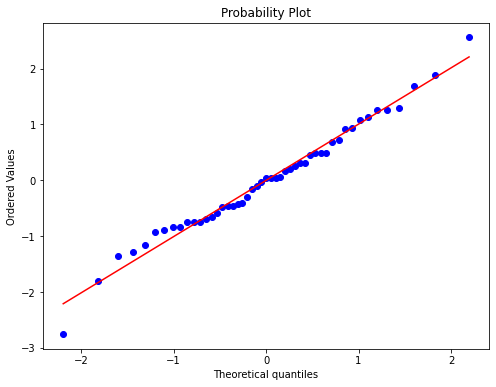

In [138]:
fig2_improve_hw3_3 = plt.figure(figsize=(8,6))
st.probplot(lm_data_improve_hw3_3.resid_pearson, dist='norm', plot=plt)
plt.show()

fig2_improve_hw3_3.savefig("fig2_improve_hw3_3.jpg")

In [139]:
st_residuals_abs_improve_hw3_3 = np.abs(lm_data_improve_hw3_3.resid_pearson)

In [140]:
diamonds['st_residuals_abs_improve_hw3_3'] = st_residuals_abs_improve_hw3_3

In [141]:
lm_data_st_residuals_improve_hw3_3 = smf.ols(formula='st_residuals_abs_improve_hw3_3~Size', data=diamonds).fit()

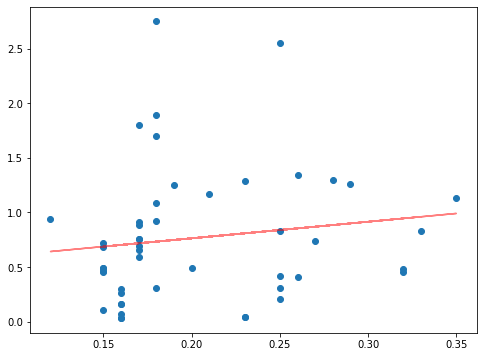

In [142]:
fig3_improve_hw3_3 = plt.figure(figsize=(8,6))
plt.scatter(diamonds['Size'], diamonds['st_residuals_abs_improve_hw3_3'])
plt.plot(diamonds['Size'], lm_data_st_residuals_improve_hw3_3.params[0] + lm_data_st_residuals_improve_hw3_3.params[1] * diamonds['Size'], color='red', alpha=0.5)
plt.show()

fig3_hw3_3.savefig('fig3_hw3_3.jpg')

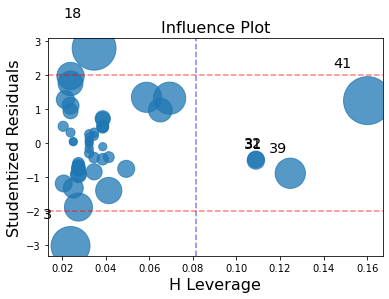

In [144]:
fig4_improve_hw3_3 = sm.graphics.influence_plot(lm_data_improve_hw3_3)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(diamonds)), color='blue', linestyle='--', alpha=0.5)
plt.show()

fig4_hw3_3.savefig("fig4_hw3_3.jpg")

Actually, it doesn't overcome weaknesses mentioned above.

If we use the $\log$-scale SLR model,

In [147]:
logdiamonds = np.log(diamonds[['Size', 'Price']])

In [148]:
logdiamonds.head()

,Size,Price
0,-1.771957,5.872118
1,-1.832581,5.793014
2,-1.771957,5.857933
3,-1.714798,5.783825
4,-1.386294,6.464588


In [149]:
lm_data_log_hw3_3 = smf.ols(formula='Price~Size', data=logdiamonds).fit()

In [150]:
lm_data_log_hw3_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1572.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           8.84e-38
Time:                        23:12:54   Log-Likelihood:                 63.247
No. Observations:                  49   AIC:                            -122.5
Df Residuals:                      47   BIC:                            -118.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5632      0.062    137.653      0.000       8.438       8.688
Size           1.4957      0.038     39.649      0.000       1.420       1.572
==============================================================================
Omnibus:                        4.574   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.466
Skew:                          -0.271   Prob(JB):                        0.107
Kurtosis:                       4.376   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

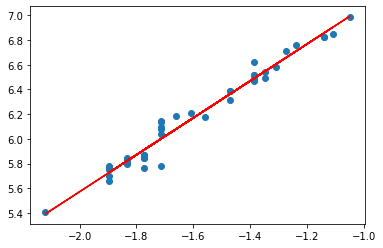

In [153]:
plt.scatter(logdiamonds['Size'], logdiamonds['Price'])
plt.plot(logdiamonds['Size'], lm_data_log_hw3_3.params[0] + lm_data_log_hw3_3.params[1] * logdiamonds['Size'], color='red')
plt.show()

In [162]:
logdiamonds['residuals_log_hw3_3'] = lm_data_log_hw3_3.resid

In [163]:
logdiamonds['st_residuals_abs_log_hw3_3'] = np.abs(lm_data_log_hw3_3.resid_pearson)

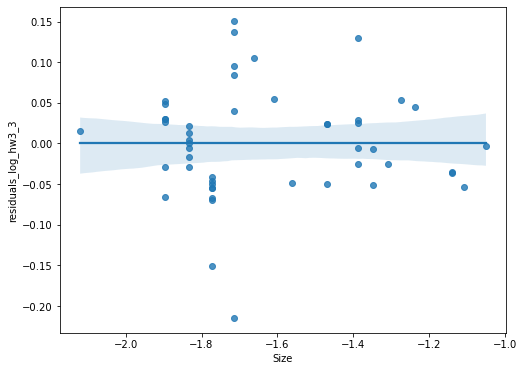

In [164]:
fig1_log_hw3_3 = plt.figure(figsize=(8,6))
sns.regplot(x='Size', y='residuals_log_hw3_3', data=logdiamonds)
plt.show()

fig1_log_hw3_3.savefig("fig1_log_hw3_3.jpg")

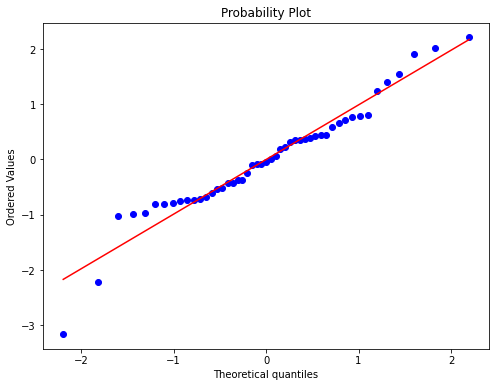

In [165]:
fig2_log_hw3_3 = plt.figure(figsize=(8,6))
st.probplot(lm_data_log_hw3_3.resid_pearson, dist='norm', plot=plt)
plt.show()

fig2_log_hw3_3.savefig("fig2_log_hw3_3.jpg")

In [167]:
lm_data_st_residuals_log_hw3_3 = smf.ols(formula='st_residuals_abs_log_hw3_3~Size', data=logdiamonds).fit()

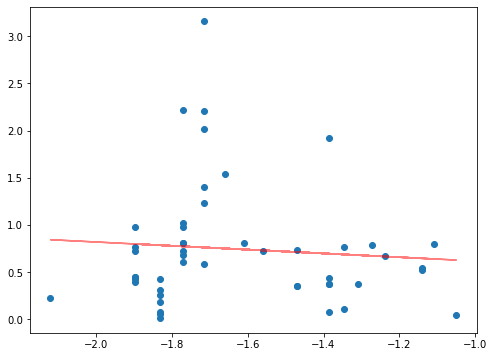

In [168]:
fig3_log_hw3_3 = plt.figure(figsize=(8,6))
plt.scatter(logdiamonds['Size'], logdiamonds['st_residuals_abs_log_hw3_3'])
plt.plot(logdiamonds['Size'], lm_data_st_residuals_log_hw3_3.params[0] + lm_data_st_residuals_log_hw3_3.params[1] * logdiamonds['Size'], color='red', alpha=0.5)
plt.show()

fig3_log_hw3_3.savefig('fig3_log_hw3_3.jpg')

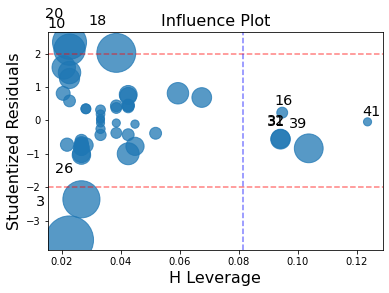

In [169]:
fig4_log_hw3_3 = sm.graphics.influence_plot(lm_data_log_hw3_3)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(logdiamonds)), color='blue', linestyle='--', alpha=0.5)
plt.show()

fig4_log_hw3_3.savefig("fig4_log_hw3_3.jpg")

It reduces the gradient of the absolute value of standardized residuals, but it cannot make the Scale-Location(3rd) smoothly.

### Part 2 - (b)

It improves the (1) weaknesses in Part 1 - (b),  
but it doesn't for (2).

### Part 3

Part B is better, because the gradient of regression of standardized residual is flatter, which guarantees constant variance.